# **Apogee Data Pipeline** - Unscaled
- **These results are far worse than others results and simply here for record of the pipeline functionality**
- **They show the result when normalised scaling has not been applied**
- **And support the need for scaling at repoducability**

In [22]:
from analysis import XDPipeline
from astropy.table import Table

In [23]:
# Set true to rerun XD analysis - approx 10 hours for 100 iterations with 3 repeats per gaussian component
rerun_XD = False

## **Importing/ Filtering Apogee Data**



In [24]:
apogee_data_filtered_path = 'data/filtered/Apogee/Apogee_data_filtered_1612.csv'

In [25]:
# Open from file into astropy Table
apogee_processed_data = Table.read(apogee_data_filtered_path, format='fits')

## **XD Pipeline**
- The XD pipeline contains the following processes and functionalities

### **Initialisation of Pipeline**
- Imports revelent total data set and the keys for the data features (and corrosponding errors of intrest)


### When `scaling=False`:

* Input features and their uncertainties are used in their **original physical units**.
* **No standardisation** is applied before fitting.
* **Energy-related features** (`'E_50'`, `'Energy'`) are **manually scaled** (divided by `1e5`) for numerical consistency.
* This **reduces numerical stability** compared to `scaling=True`.

In [26]:
apogee_data_keys = ['fe_h', 'alpha_m', 'E_50', 'ce_fe', 'al_fe', 'mg_mn']
apogee_data_error_keys = ['fe_h_err', 'alpha_m_err', 'E_err', 'ce_fe_err', 'al_fe_err', 'mg_mn_err']

apogee_pipeline = XDPipeline(apogee_processed_data, apogee_data_keys, apogee_data_error_keys, scaling=False)

### **XD Run Overview**  

#### **Parameters**  

| **Parameter**                     | **Value**  |
|------------------------------------|------------|
| **Max EM Iterations**              | \(10^9\)   |
| **Number of Gaussian Components**  | 0 – 10     |
| **Repeats per Gaussian Component** | 3          |
| **Initializations per Repeat**     | 100        |

#### **Stored Data**  
- Achieved Weights, Means, and Covariances for each run  
- Model Evaluation Metrics:  
  - AIC (Akaike Information Criterion)
  - BIC (Bayesian Information Criterion)

In [27]:
if rerun_XD:
    apogee_pipeline.run_XD(gauss_component_range=(7,7), max_iterations=int(1e9), n_repeats=1, n_init=20, save_path='XD_Results/Apogee/apogee_XD_6_6_unscaled.pkl')

### **Run Results Analysis** 

#### **Overall**

| **Overall Results Analysis**                        | **Details** |
|---------------------------------|------------|
| **Performance Metric**          | BIC Score |
| **Filters Applied**             | None |
| **Saves**                       | Gaussian Weights, Means, and Covariances |
| **Records**                     | Corresponding BIC score |

#### **Filtered**

| **Filtered Results Analysis**   | **Details** |
|---------------------------------|------------|
| **Performance Metric**          | BIC Score |
| **Filters Applied**             | 5 Gaussian Components |
| **Saves**                       | Gaussian Weights, Means, and Covariances |
| **Records**                     | Corresponding BIC score |


 Best Overall AIC Score: -6976.4430 occurred at:
   - Gaussian Components (n_gauss): 5
   - Repeat cycle (n): 1
   - Initialisation (i): 7
 The following filters were applied: {'n_gauss': 5, 'repeat': None}
 Best AIC Score from filtered inputs: -6976.4430 occurred at:
   - Gaussian Components (n_gauss): 5
   - Repeat cycle (n): 1
   - Initialisation (i): 7
Table of Number of Gaussians vs Number of Failed XD Runs
+----+-----------------+----------------------+------------------+
|    |   No. Gaussians |   No. Failed XD runs |   Total No. Runs |
|----+-----------------+----------------------+------------------|
|  0 |               1 |                    0 |              300 |
|  1 |               2 |                    0 |              300 |
|  2 |               3 |                    0 |              300 |
|  3 |               4 |                    0 |              300 |
|  4 |               5 |                    0 |              300 |
|  5 |               6 |                    0 | 

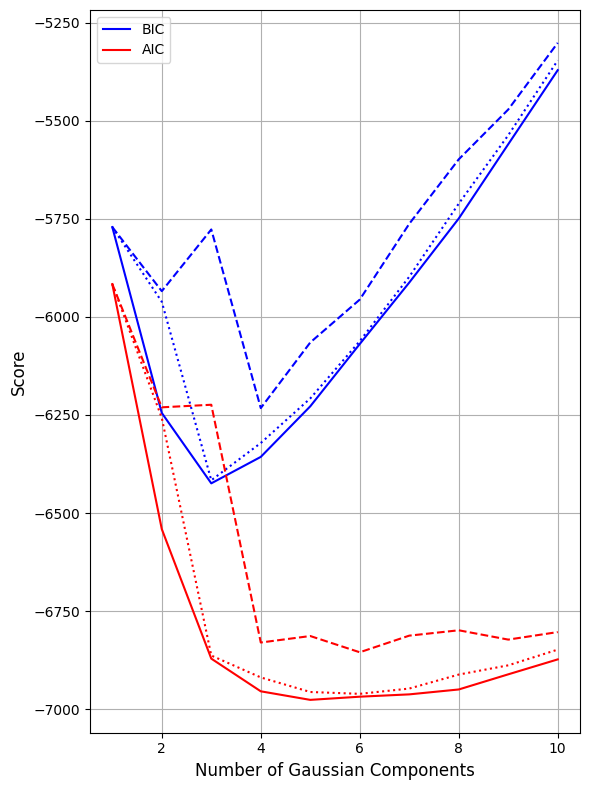

In [28]:
apogee_pipeline.compare_XD(opt_metric = 'AIC', n_gauss_filter =5, repeat_no_filter = None, save_path='XD_Results/Apogee/apogee_XD_6_6_unscaled.pkl')

### **Determine Responsibilities and Assignment**

- Use the gaussian components from the best XD run of filter subset (best filtered)

In [29]:
apogee_pipeline.assigment_XD(assignment_metric = 'best filtered')

Assigning stars to Gaussian components based on the best filtered XD model.
This has been optimised for the AIC score and returned the results:
 Best AIC Score: -6976.4430 occurred at:
   - Gaussian Components (n_gauss): 5
   - Repeat cycle (n): 1
   - Initialisation (i): 7


### **Print Summary of Gaussian Components and Assigment**


In [30]:
# labels = {
#     0: "GS/E 1",
#     5: "GS/E 2",
#     2: "Splash",
#     6: "Aurora",
#     1: "Eos",
#     4: "Back 1",
#     3: "Back 2"
# }

apogee_gauss_summary = apogee_pipeline.table_results_XD() #labels, combine=[[0, 5], [3, 4]], labels_combined = ['GS/E', 'Background'])


Summary of GMM Fit Result for GALAH-Gaia Sample
+----+-------------+--------------+---------+-------------+--------------+-------------+--------------------------+--------------+--------------+-------------+
|    | Component   |   Weight (%) |   Count |   Count (%) | fe_h         | alpha_m     | Energy ($\times 10^5$)   | ce_fe        | al_fe        | mg_mn       |
+====+=============+==============+=========+=============+==============+=============+==========================+==============+==============+=============+
|  0 | Component 3 |         33.4 |     509 |        31.6 | -1.01 ± 0.19 | 0.17 ± 0.04 | -1.57 ± 0.06             | -0.14 ± 0.02 | -0.19 ± 0.02 | 0.43 ± 0.08 |
+----+-------------+--------------+---------+-------------+--------------+-------------+--------------------------+--------------+--------------+-------------+
|  1 | Component 4 |         28.4 |     493 |        30.6 | -1.34 ± 0.16 | 0.23 ± 0.02 | -1.57 ± 0.14             | -0.19 ± 0.03 | -0.21 ± 0.05 | 0.55 

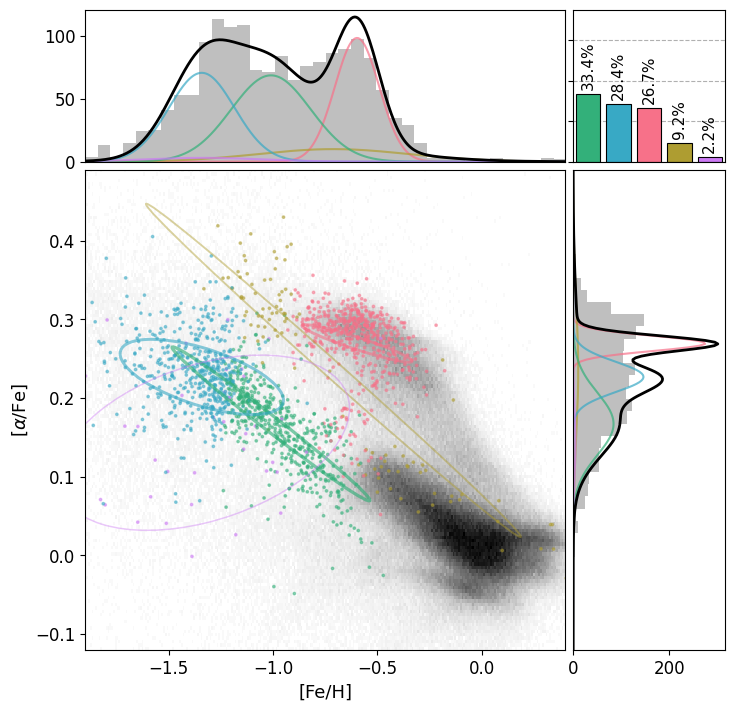

In [31]:
apogee_pipeline.plot_XD( x_key = 'fe_h', y_key='alpha_m',
    z_score=2,
    full_survey_file='data/raw/Total_Apogee/ApogeeDR17_allStarLite.fits',
    # color_palette=["green", "blue", "magenta", "lightskyblue", "cyan", "darkorange", "red"
    # ], 
    xlim = (-1.9, 0.4), ylim=(-0.12, 0.49),
)

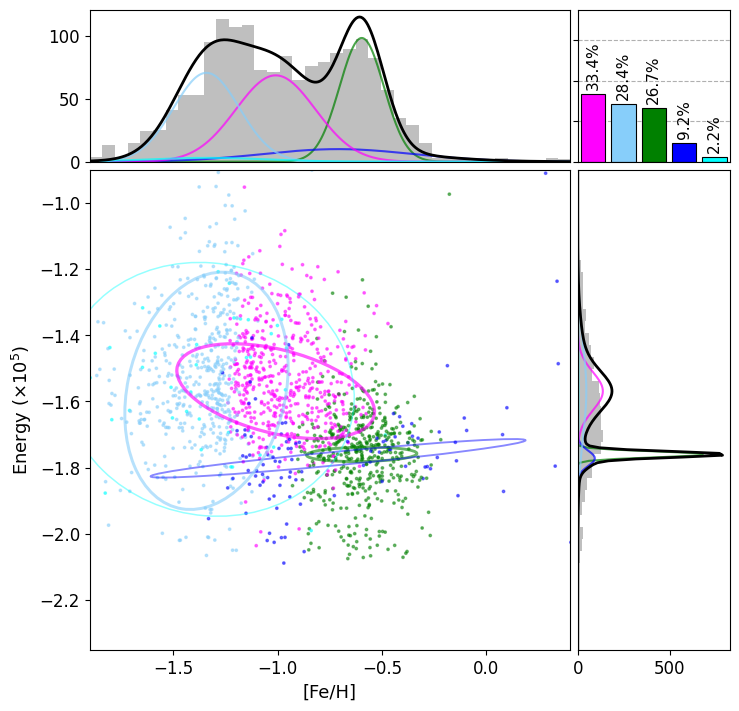

In [32]:
apogee_pipeline.plot_XD( x_key = 'fe_h', y_key='E_50',
    z_score=2,
    full_survey_file='data/raw/Total_Apogee/ApogeeDR17_allStarLite.fits',
    color_palette=["green", "blue", "magenta", "lightskyblue", "cyan", "darkorange", "red"
    ], 
    xlim = (-1.9, 0.4), ylim=(-2.35, -0.9),
)

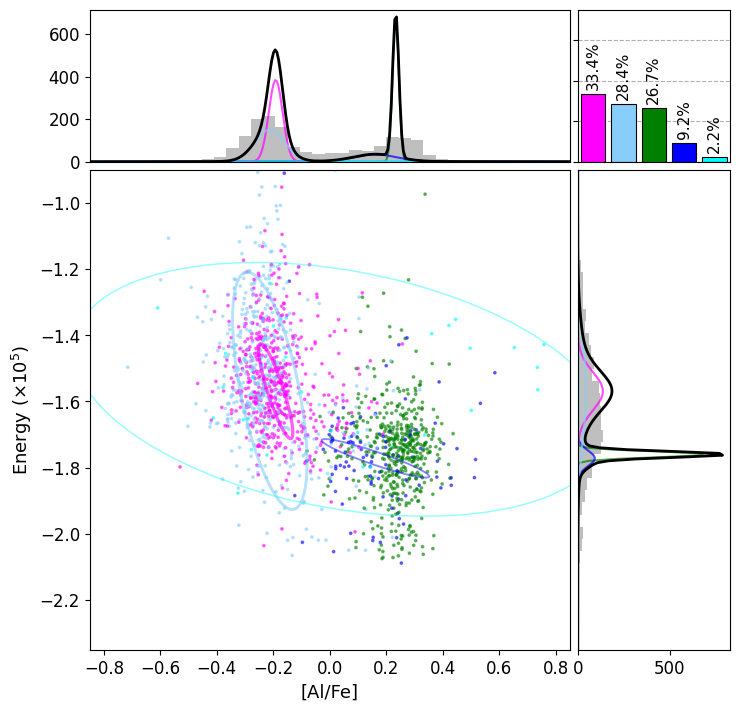

In [33]:
apogee_pipeline.plot_XD( x_key = 'al_fe', y_key='E_50',
    z_score=2,
    full_survey_file='data/raw/Total_Apogee/ApogeeDR17_allStarLite.fits',
    color_palette=["green", "blue", "magenta", "lightskyblue", "cyan", "darkorange", "red"
    ], 
    xlim = (-0.85, 0.85), ylim=(-2.35, -0.9),
)

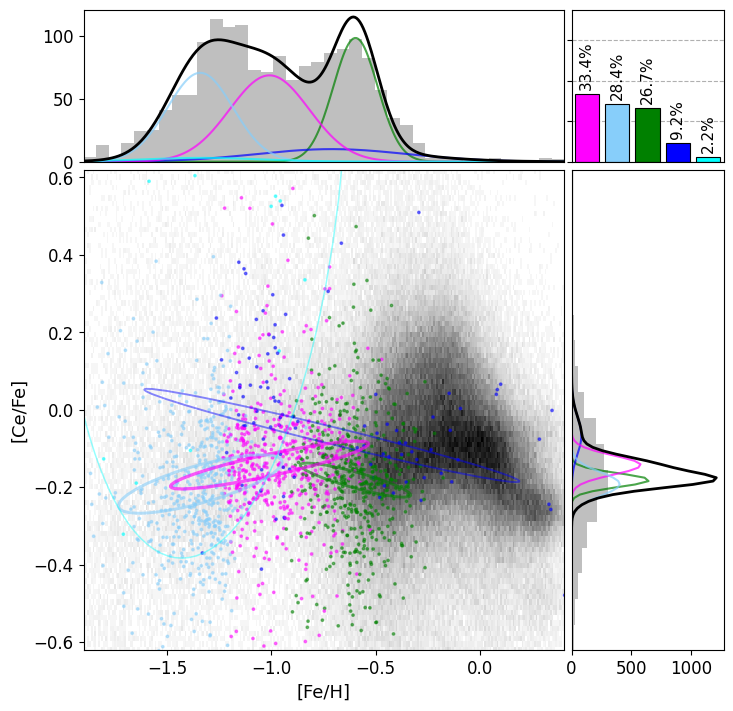

In [34]:
apogee_pipeline.plot_XD( x_key = 'fe_h', y_key='ce_fe',
    z_score=2,
    full_survey_file='data/raw/Total_Apogee/ApogeeDR17_allStarLite.fits',
    color_palette=["green", "blue", "magenta", "lightskyblue", "cyan", "darkorange", "red"
    ], 
    xlim = (-1.9, 0.4), ylim=(-0.62, 0.62),
)

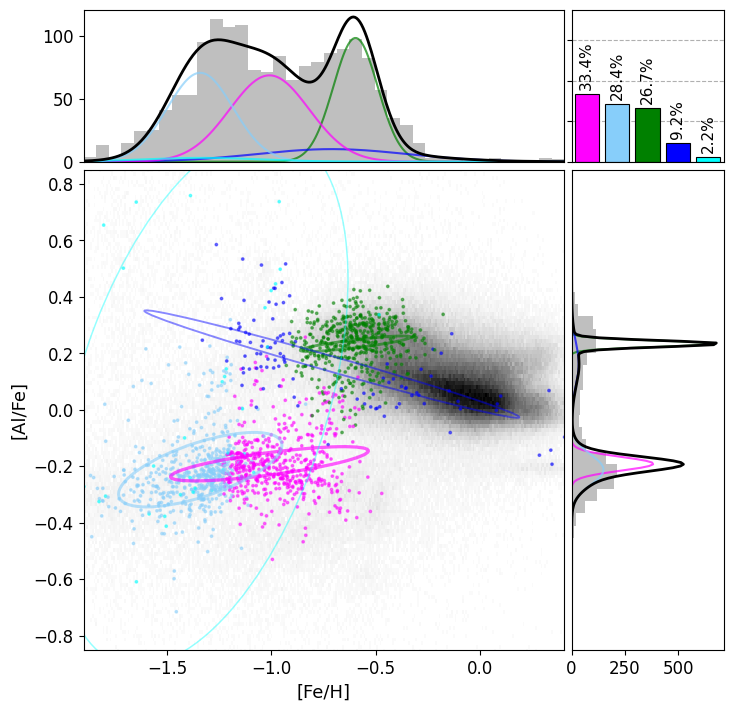

In [35]:
apogee_pipeline.plot_XD( x_key = 'fe_h', y_key='al_fe',
    z_score=2,
    full_survey_file='data/raw/Total_Apogee/ApogeeDR17_allStarLite.fits',
    color_palette=["green", "blue", "magenta", "lightskyblue", "cyan", "darkorange", "red"
    ], 
    xlim = (-1.9, 0.4), ylim=(-0.85, 0.85),
)

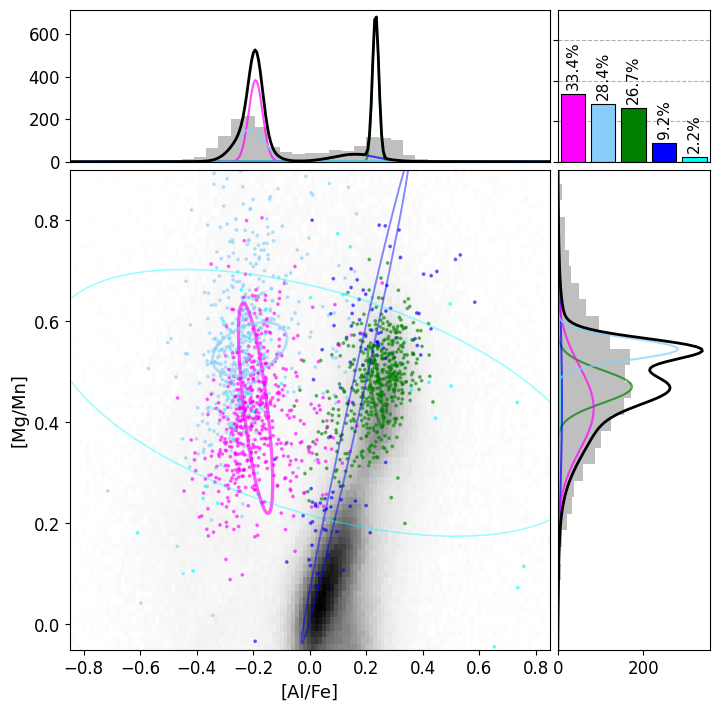

In [36]:
apogee_pipeline.plot_XD( x_key = 'al_fe', y_key='mg_mn',
    z_score=2,
    full_survey_file='data/raw/Total_Apogee/ApogeeDR17_allStarLite.fits',
    color_palette=["green", "blue", "magenta", "lightskyblue", "cyan", "darkorange", "red"
    ], 
    xlim =(-0.85, 0.85), ylim=(-0.05, 0.9),
)

## Figure 5 Plots

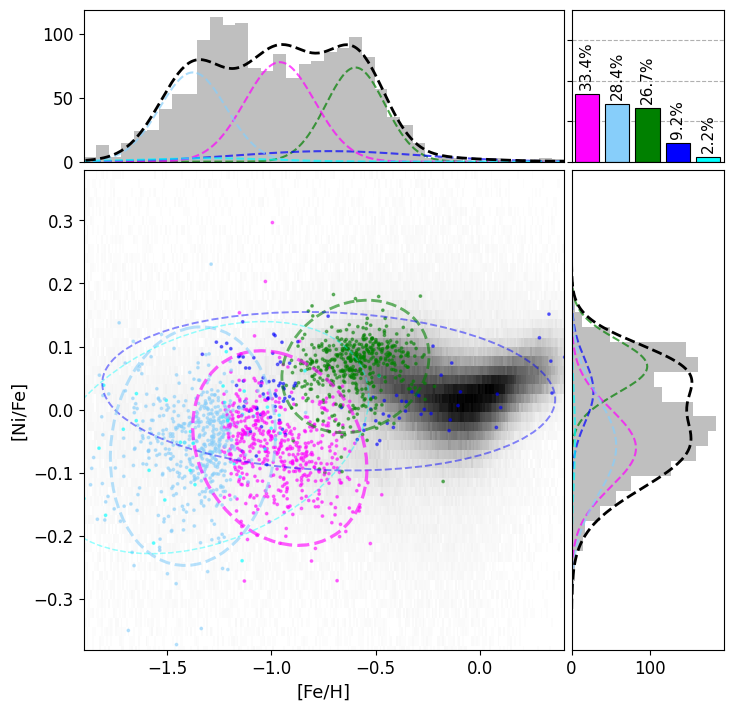

In [37]:
apogee_pipeline.plot_nonXD( x_key = 'fe_h', y_key='ni_fe',
    z_score=2,
    full_survey_file='data/raw/Total_Apogee/ApogeeDR17_allStarLite.fits',
    color_palette=["green", "blue", "magenta", "lightskyblue", "cyan", "darkorange", "red"
    ], 
    xlim =(-1.9, 0.4), ylim=(-0.38, 0.38),
)